# 210968054
# Name: Dishita Mohan
# Week5
# Question 2

In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_excel('employment.xlsx', parse_dates=['datestamp'], index_col='datestamp')


# df=pd.read_excel('employment.xlsx', parse_date=True, index_col='datestamp')
df=pd.read_excel('employment.xlsx')
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [113]:
# 1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.


df.dtypes

df.set_index('datestamp')
df


,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [114]:
# count of missing values in each column
df.isnull().sum()

datestamp                         0
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

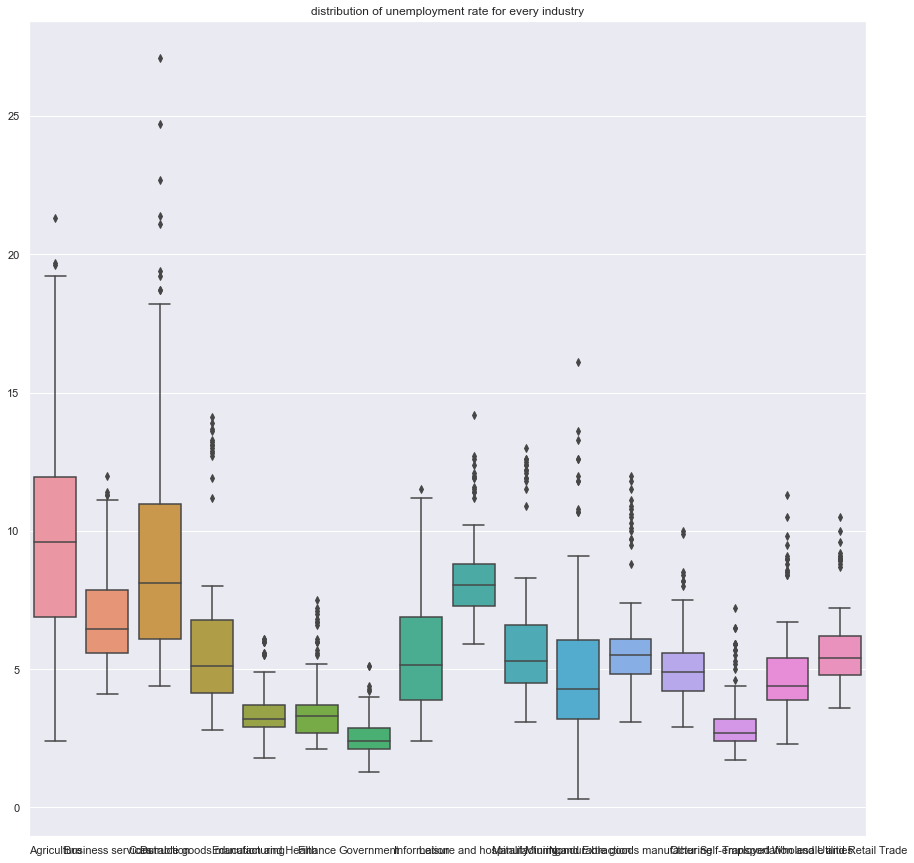

In [120]:
# 2. Generate a boxplot to find the distribution of unemployment rate for every industry.

sns.boxplot(data=df)
plt.title("distribution of unemployment rate for every industry")
sns.set(rc={"figure.figsize":(15,15)})
sns.set(font_scale=2)
plt.show()

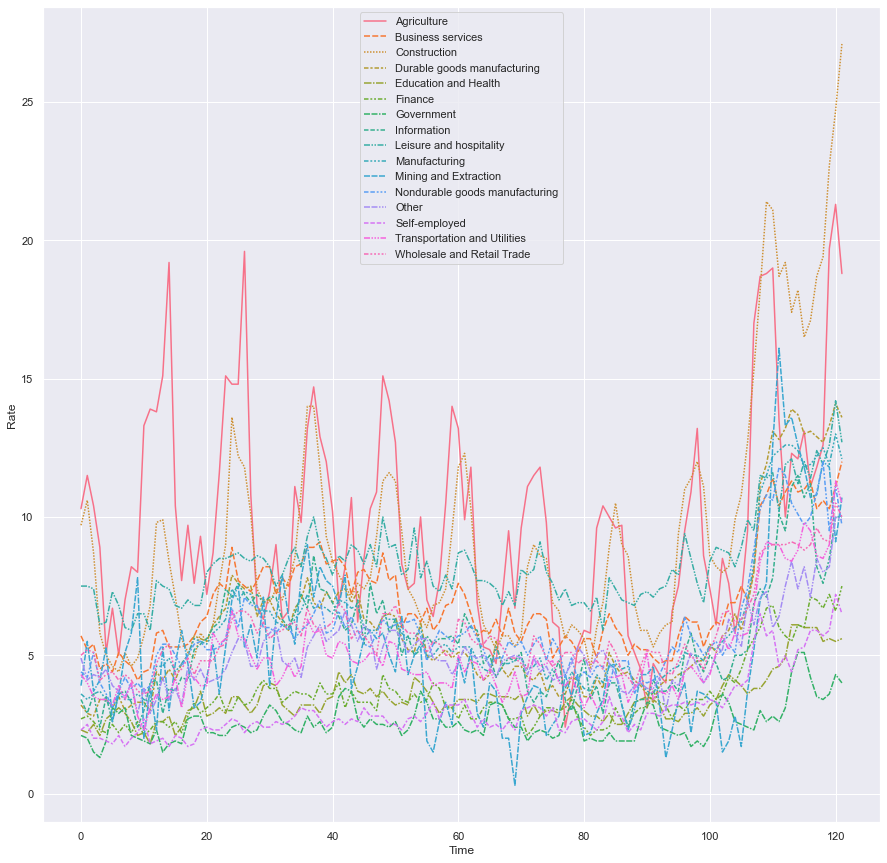

In [118]:
# 3. Using line chart Visualize the unemployment rate of workers by industry.

sns.lineplot(data=df)
plt.xlabel("Time")
plt.ylabel("Rate")
sns.set(font_scale=2)
plt.show()

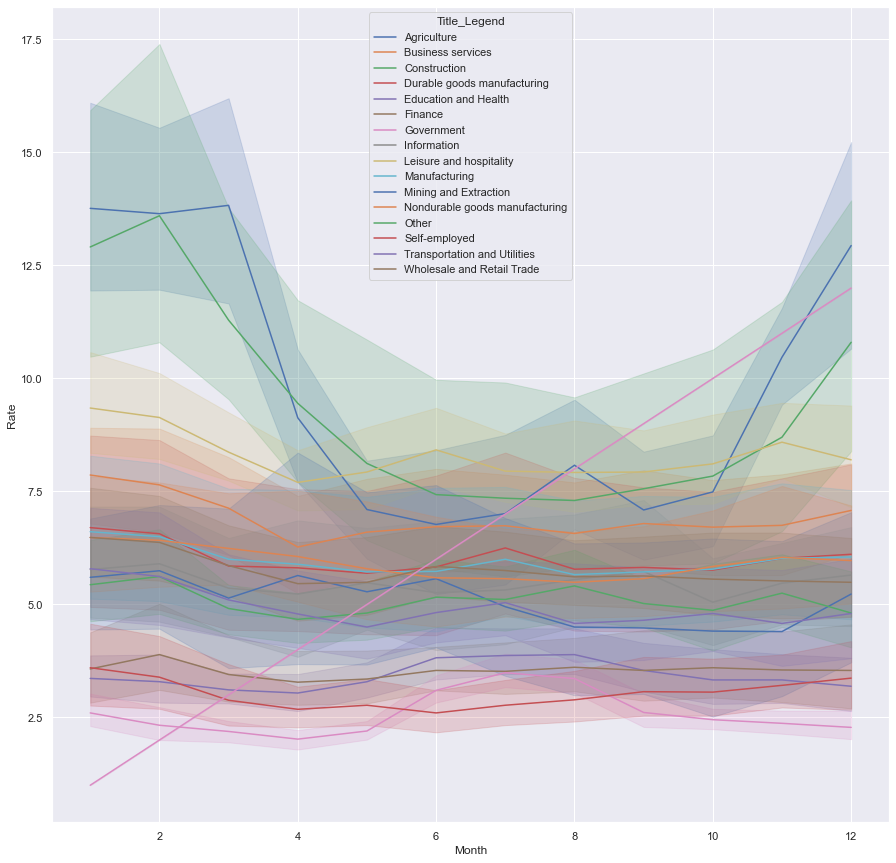

In [107]:
# 4. Plot the monthly and yearly trends.

df['month']=pd.DatetimeIndex(df['datestamp']).month

df['year']=pd.DatetimeIndex(df['datestamp']).year


# df.plot(x='month', y= df1[1] kind="scatter")
i=1
while (i<=17):
    sns.lineplot(x='month',y=df.iloc[:, i],data=df)
    i=i+1
    
plt.xlabel("Month")
plt.ylabel("Rate")
plt.legend(labels=df.iloc[:, 1:17], title = "Title_Legend")

# sns.lineplot(x='month',y='Agriculture',data=df)
sns.set(font_scale=2)

plt.show()


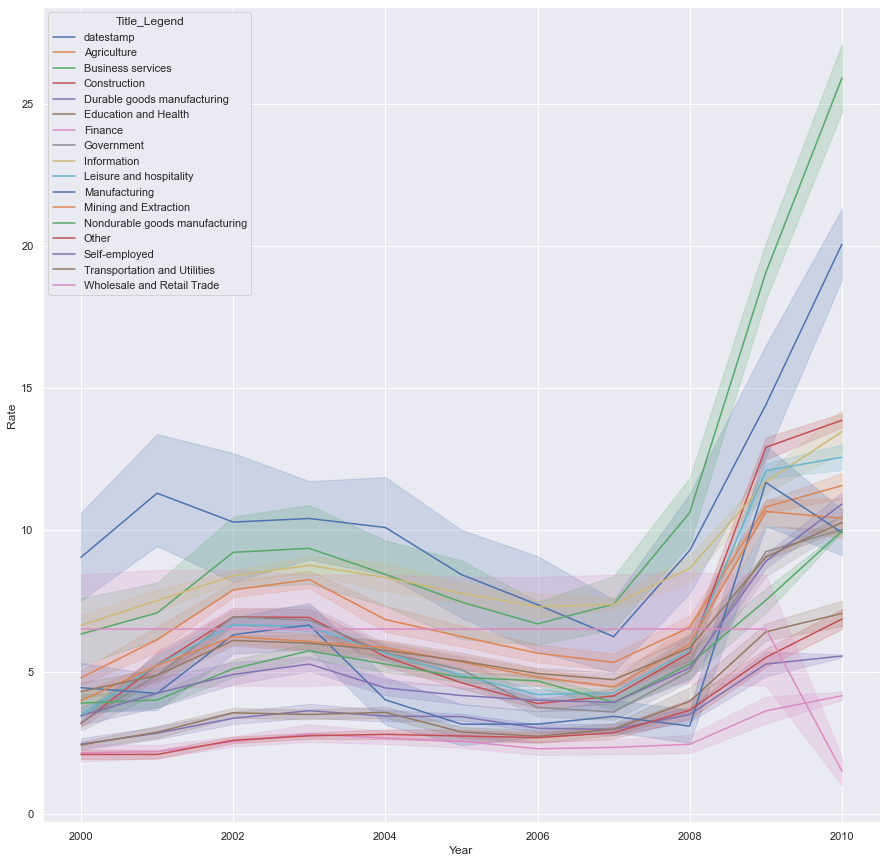

In [109]:
i=1
while (i<=17):
    sns.lineplot(x='year',y=df.iloc[:, i],data=df)
    i=i+1
    
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend(labels=df.iloc[:, 0:17], title = "Title_Legend")

# sns.lineplot(x='month',y='Agriculture',data=df)
sns.set(font_scale=2)

plt.show()

In [125]:
# 5. Apply time series decomposition to your dataset to visualize the trend and seasonality.




result = seasonal_decompose(df, model='multiplicative')
print(result.trend)
print(result.seasonal)

result.plot()
pyplot.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'